# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [28]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [29]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

(-0.5, 27.5, 27.5, -0.5)

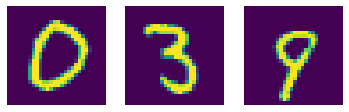

In [31]:
number = X_train[10]
number_pixels = number.reshape(28, 28)
plt.subplot(131)
plt.imshow(number_pixels)
plt.axis('off')
 
number = X_train[11]
number_pixels = number.reshape(28, 28)
plt.subplot(132)
plt.imshow(number_pixels)
plt.axis('off')
 
number = X_train[12]
number_pixels = number.reshape(28, 28)
plt.subplot(133)
plt.imshow(number_pixels)
plt.axis('off')

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [32]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
# Simple linear model
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

linear = make_pipeline(StandardScaler(),SGDClassifier(max_iter=100, loss='log',tol=1e-3))
linear.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                               max_iter=100, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

random_forest = RandomForestClassifier(max_depth=2, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [76]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve




In [66]:
# Naive Bayes
# Accuracy
accuracy_score(y_train, bayes.predict(X_train))

0.5507675906183369

In [67]:
# F-Measure
f1_score(y_train,bayes.predict(X_train), average='weighted')

0.5026889497697535

In [68]:
# Confusion Matrix
confusion_matrix(y_train,bayes.predict(X_train))

array([[4286,   10,   22,   11,    6,    9,  127,    2,   83,   80],
       [   3, 4967,   11,   23,    3,    6,   77,    1,  112,   71],
       [ 537,  127, 1432,  241,   11,   10, 1224,   17,  955,   86],
       [ 493,  243,   43, 1619,    6,    3,  321,   40, 1412,  578],
       [ 214,   33,   39,   29,  578,   24,  582,   24,  871, 2286],
       [ 689,  116,   25,   75,   15,  143,  299,    9, 2355,  480],
       [  51,   79,   22,    2,    3,   14, 4334,    0,   70,    7],
       [  26,   39,    6,   33,   30,    5,   19, 1402,  136, 3142],
       [  98,  652,   23,   34,   11,   20,  121,    6, 2654, 1010],
       [  30,   36,   10,    6,   21,    4,    5,   58,   71, 4416]])

In [ ]:
# Get 5
y_fi

In [55]:
# Simple linear mode
accuracy_score(y_train, linear.predict(X_train))

0.9222174840085288

In [56]:
# F-Measure
f1_score(y_train,linear.predict(X_train), average='weighted')

0.9224283222769203

In [62]:
# Confusion Matrix
confusion_matrix(y_train,linear.predict(X_train))

array([[4484,    0,    9,   11,    6,   30,   28,    3,   63,    2],
       [   1, 5085,   35,   12,    3,   28,    8,    5,   85,   12],
       [  27,   14, 4193,   71,   56,   20,   49,   34,  169,    7],
       [  19,   14,   93, 4231,    3,  160,   20,   35,  126,   57],
       [   8,   15,   26,    4, 4343,    5,   36,   19,   82,  142],
       [  40,   21,   17,  115,   42, 3637,   71,   17,  189,   57],
       [  22,   12,   24,    0,   29,   68, 4372,    2,   53,    0],
       [  17,   18,   53,   18,   28,    4,    3, 4511,   27,  159],
       [  17,   65,   38,   73,    3,   94,   25,   10, 4239,   65],
       [  22,   20,   20,   65,  108,   34,    3,  118,  110, 4157]])

In [47]:
# Random Forest
accuracy_score(y_train, random_forest.predict(X_train))

0.6429850746268657

In [57]:
# F-Measure
f1_score(y_train,random_forest.predict(X_train), average='weighted')

0.609103935786978

In [63]:
confusion_matrix(y_train,random_forest.predict(X_train))

array([[4516,   11,   20,   13,    4,    0,   23,   32,   17,    0],
       [   3, 5215,   18,    7,    2,    0,    2,   15,    3,    9],
       [ 377, 1086, 2672,   62,   88,    0,   92,  185,   71,    7],
       [ 417,  848,  114, 2949,   73,    0,   12,  175,   66,  104],
       [  96,   93,   40,    3, 3804,    0,  101,  224,   21,  298],
       [1240,  667,   47,  979,  260,  127,   89,  185,  215,  397],
       [ 567,  413,  183,   71,  281,    0, 2929,   90,   35,   13],
       [ 161,  343,  111,    0,  192,    0,    2, 3936,   33,   60],
       [ 109, 1453,  211,  244,  137,    0,   85,   79, 2072,  239],
       [  89,  152,   17,   62, 1697,    0,   21,  644,   39, 1936]])

In [84]:
# ROC curve

y_5 = y_test=='5'
bayes_5 = bayes.predict(X_test).astype(int)==5
linear_5 = linear.predict(X_test).astype(int)==5
random_forest_5 = random_forest.predict(X_test).astype(int)==5


Text(0, 0.5, 'True Positive Rate')

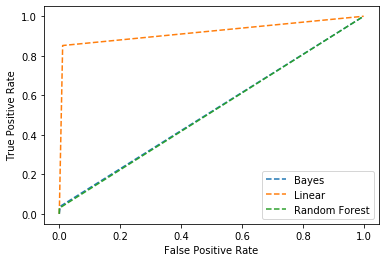

In [95]:

bayes_fpr, bayes_tpr, _ = roc_curve(y_5, bayes_5)
linear_fpr, linear_tpr, _ = roc_curve(y_5, linear_5)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_5, random_forest_5)

plt.plot(bayes_fpr, bayes_tpr, linestyle='--', label='Bayes')
plt.plot(linear_fpr, linear_tpr, linestyle='--', label='Linear')
plt.plot(random_forest_fpr, random_forest_tpr, linestyle='--', label='Random Forest')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')